In [1]:
import matplotlib.pyplot as plt
import os
import sys
import warnings
from scipy.optimize import OptimizeWarning
import numpy as np
import pandas as pd

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots
import potential_data
import potential_analyze
import fit

warnings.simplefilter("ignore", OptimizeWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [2]:
def potential_smearing_custom(paths, df_smearing_path):
    df = potential_data.get_potantial_df(paths, ['smearing_step', 'range_min_T', 'range_min_r'])
    df_smearing = pd.read_csv(df_smearing_path)
    df = potential_analyze.slice_smearing(df, df_smearing)
    df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
    df_fit = df.groupby(df.index.names).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
    df_fit = df_fit.groupby(df.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True)
    df_curves = df_fit.groupby(df_fit.index.names).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['smearing_step'])
    df = df.reset_index(level=['smearing_step'])
    return df, df_curves

def potential_smearing(paths):
    df = potential_data.get_potantial_df(paths, ['smearing_step', 'range_min_T', 'range_min_r'])
    df = df.reset_index(level='smearing_step')
    # df = df[df['smearing_step'].isin([0, 1, 11, 71])]
    df = df.set_index('smearing_step', append=True)
    df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
    df_fit = df.groupby(df.index.names).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
    df_fit = df_fit.groupby(df.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True)
    df_curves = df_fit.groupby(df_fit.index.names).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['smearing_step'])
    df = df.reset_index(level=['smearing_step'])
    return df, df_curves

In [3]:
def APE_smearing_comparison(lattice_size, L, beta, smearing, additional_params, decomposition_type, copy=None):
    paths = [{'path': f'../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{lattice_size}/beta{beta}/{smearing}/{additional_params}/potential_{decomposition_type}.csv',
          'parameters': {'beta': beta, 'range_min_T': L // 2 - 4, 'range_min_r': L // 2 - 3}, 'constraints': {'r/a': (1, L // 2), 'T': (1, L // 2 - 1)}}]
    if copy is not None:
        paths[0]['constraints'] = {'copy': (copy, copy)}
    df_smearing_path = f'../../result/smearing/potential/su3/gluodynamics/APE_parameters/{lattice_size}/beta{beta}/{smearing}/{additional_params}/APE_parameters_{decomposition_type}.csv'
    df, df_curves = potential_smearing_custom(paths, df_smearing_path)
    paths1 = [{'path': f'../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/{lattice_size}/beta{beta}/{smearing}/{additional_params}/potential_{decomposition_type}.csv',
              'parameters': {'beta': beta, 'range_min_T': L // 2 - 4, 'range_min_r': L // 2 - 3}, 'constraints': {'r/a': (1, L // 2), 'T': (1, L // 2 - 1), 'smearing_step': (0, 151)}}]
    if copy is not None:
        paths1[0]['constraints'] = {'copy': (copy, copy)}
    df1, df_curves1 = potential_smearing(paths1)
    df = pd.concat([df, df1])
    df_curves = pd.concat([df_curves, df_curves1])
    image_path = f'../../images/smearing/potential/su3/gluodynamics/APE_smearing_dependence/{lattice_size}/beta{beta}/{smearing}/{additional_params}'
    image_name = f'potential_{decomposition_type}'
    fg = plots.make_plot(df, 'r/a', 'aV(r)', 'smearing_step', 'r/a', 'aV(r)', f'{decomposition_type} potential', image_path, image_name, True, err='err', df_fits=df_curves)
    plots.save_image(image_path, image_name, fg)

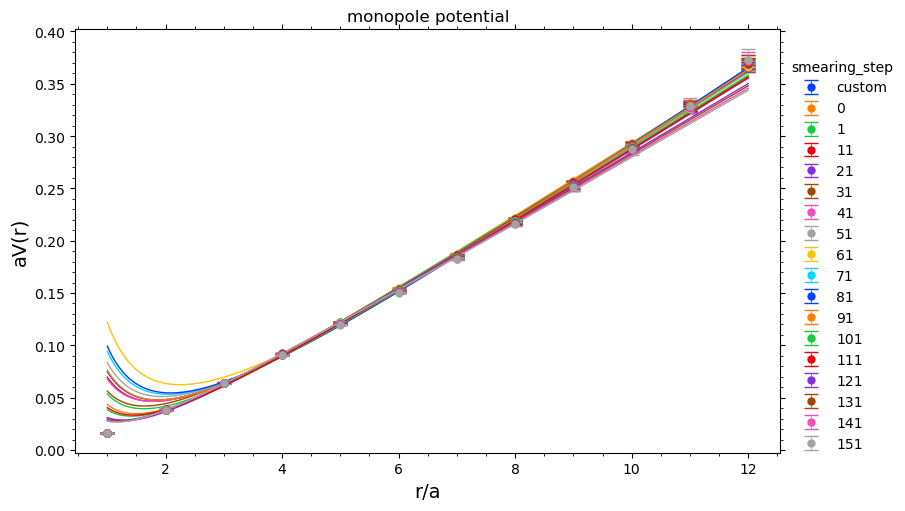

In [4]:
APE_smearing_comparison('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole')

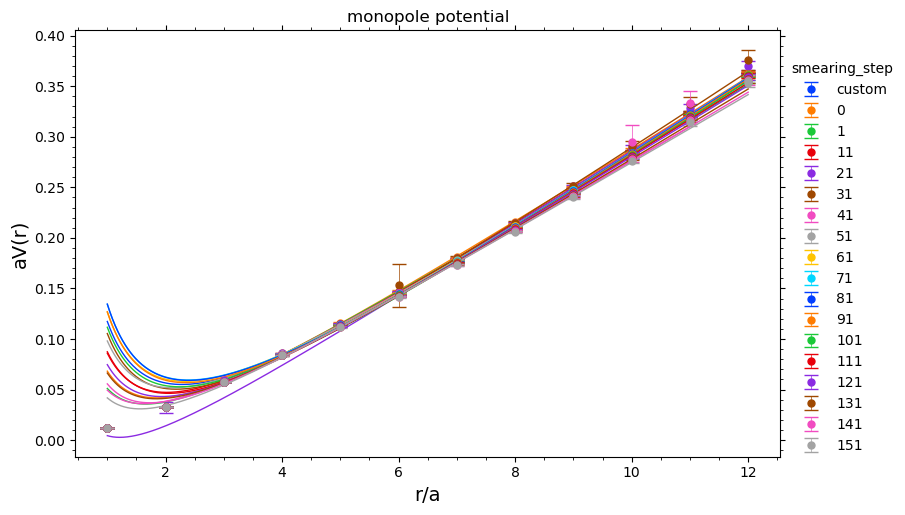

In [5]:
APE_smearing_comparison('24^4', 24, '6.0', 'HYP1_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole')

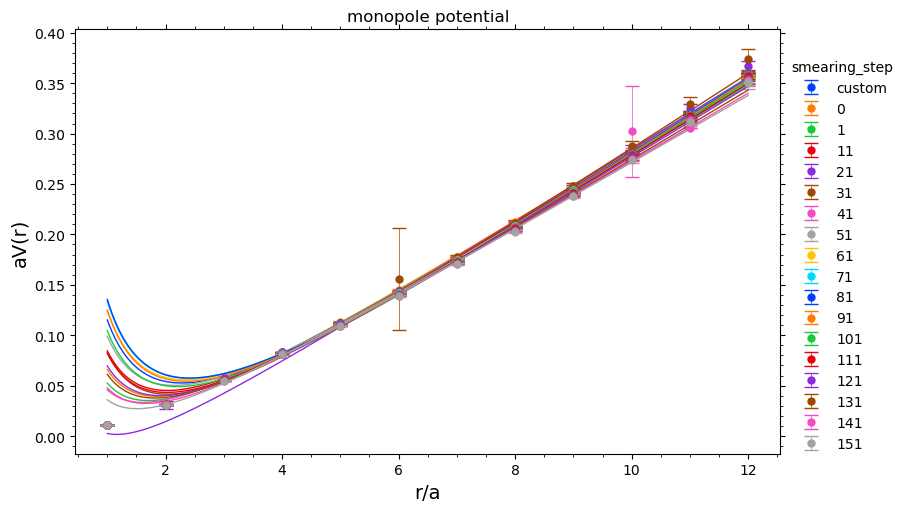

In [6]:
APE_smearing_comparison('24^4', 24, '6.0', 'HYP3_alpha=1_1_0.5_APE_alpha=0.5', 'steps_500/copies=4', 'monopole')

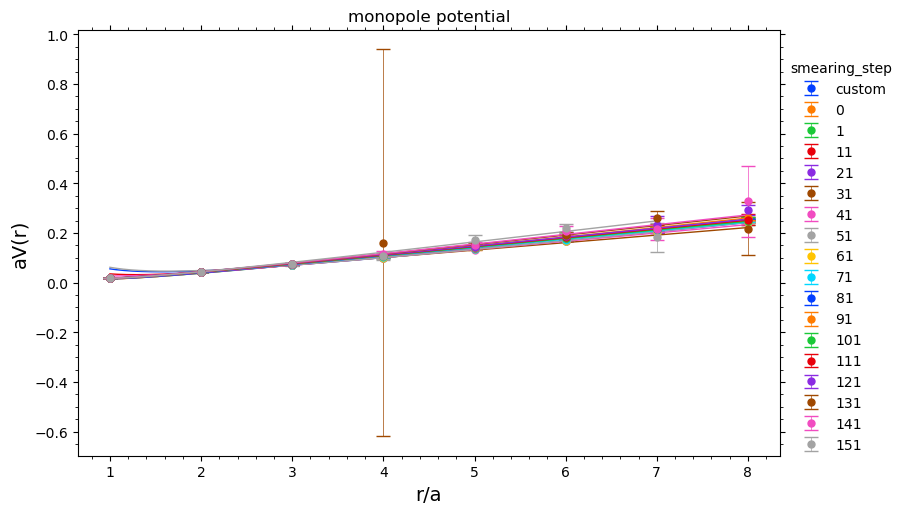

In [7]:
APE_smearing_comparison('16^4', 16, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole')

In [8]:
APE_smearing_comparison('24^4', 24, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole', copy=1)

KeyError: 13

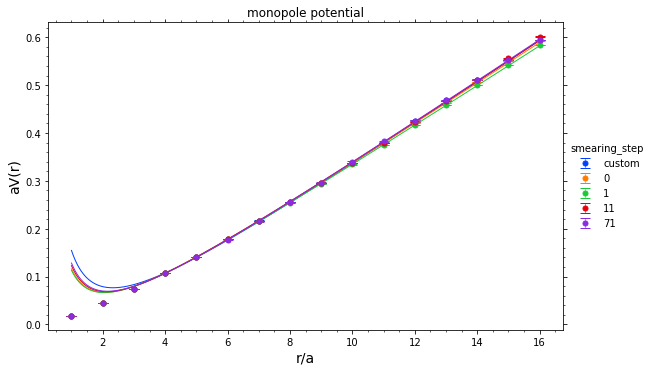

In [ ]:
APE_smearing_comparison('32^4', 32, '6.0', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole', copy=1)

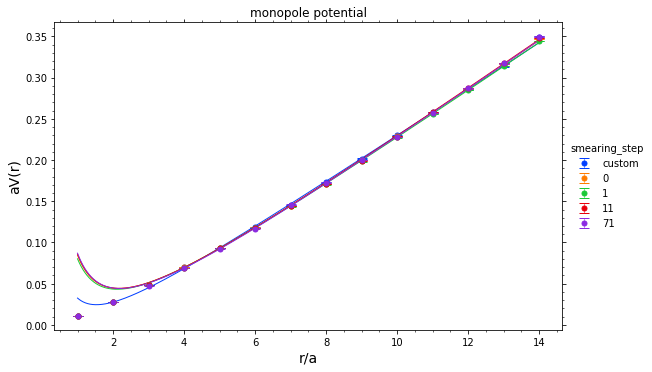

In [ ]:
APE_smearing_comparison('28^4', 28, '6.1', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole', copy=1)

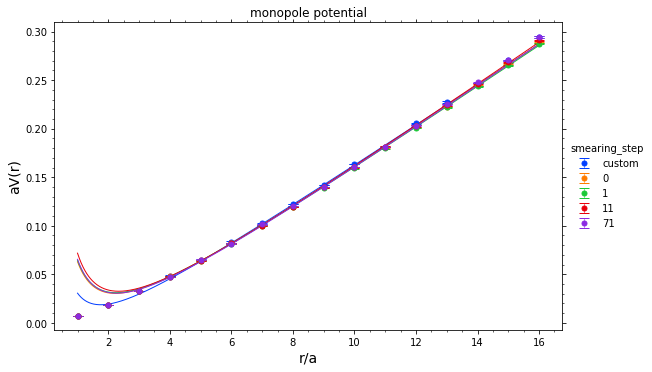

In [ ]:
APE_smearing_comparison('32^4', 32, '6.2', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole', copy=1)

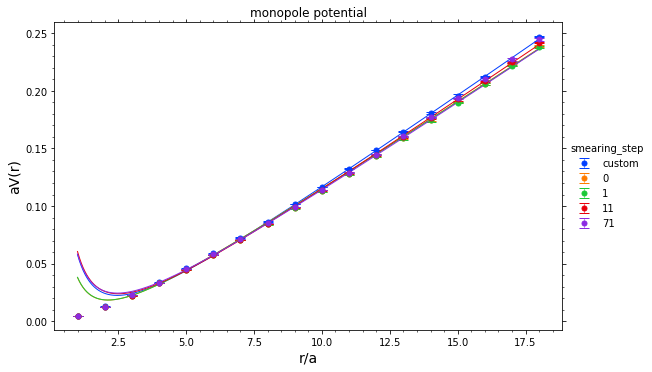

In [ ]:
APE_smearing_comparison('36^4', 36, '6.3', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole', copy=1)

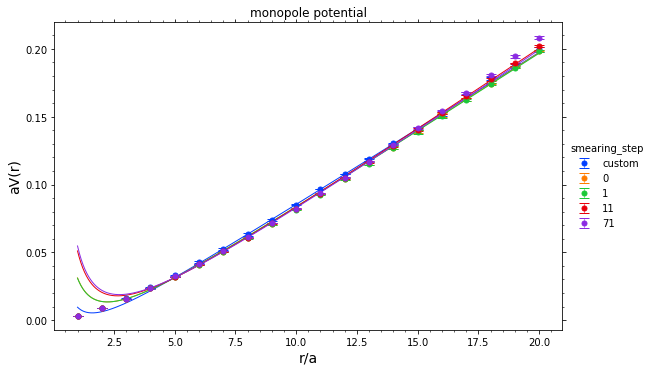

In [ ]:
APE_smearing_comparison('40^4', 40, '6.4', 'HYP0_alpha=1_1_0.5_APE_alpha=0.6', 'steps_0/copies=20', 'monopole', copy=1)

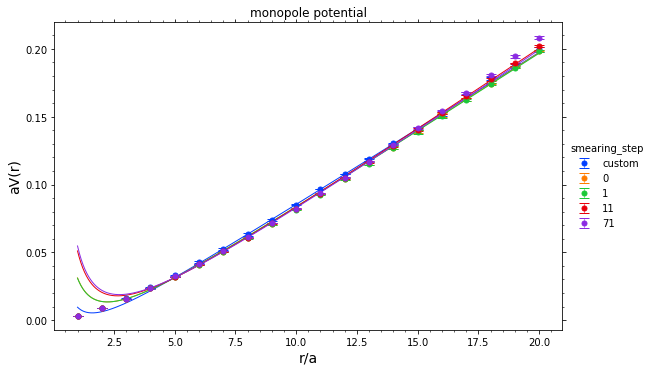

In [11]:
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 6.4, 'range_min_T': 16, 'range_min_r': 17}, 'constraints': {'r/a': (1, 20), 'T': (1, 19)}}]
df_smearing_path = '../../result/smearing/potential/su3/gluodynamics/APE_parameters/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/APE_parameters_monopole.csv'
df, df_curves = potential_smearing_custom(paths, df_smearing_path)
paths1 = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 6.4, 'range_min_T': 16, 'range_min_r': 17}, 'constraints': {'r/a': (1, 20), 'T': (1, 19), 'smearing_step': (0, 71)}}]
df1, df_curves1 = potential_smearing(paths1)
df = pd.concat([df, df1])
df_curves = pd.concat([df_curves, df_curves1])
image_path = '../../images/smearing/potential/su3/gluodynamics/APE_smearing_dependence/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20'
image_name = 'potential_monopole'
fg = plots.make_plot(df, 'r/a', 'aV(r)', 'smearing_step', 'r/a', 'aV(r)', 'monopole potential', image_path, image_name, True, err='err', df_fits=df_curves)
plots.save_image(image_path, image_name, fg)

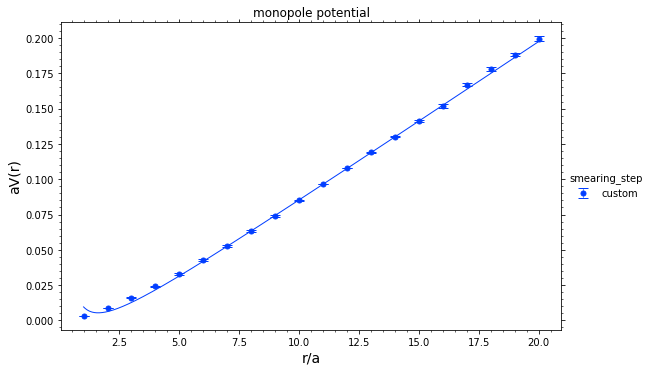

In [12]:
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 6.4, 'range_min_T': 16, 'range_min_r': 17}, 'constraints': {'r/a': (1, 20), 'T': (1, 19)}}]
df = potential_data.get_potantial_df(paths, ['smearing_step', 'range_min_T', 'range_min_r'])
df_smearing = pd.read_csv('../../result/smearing/potential/su3/gluodynamics/APE_parameters/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/APE_parameters_monopole.csv')
df = potential_analyze.slice_smearing(df, df_smearing)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
df_fit = df.groupby(df.index.names).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(df.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True)
df_curves = df_fit.groupby(df_fit.index.names).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['smearing_step'])
df = df.reset_index(level=['smearing_step'])
image_path = '../../images/potential/su3/gluodynamics/su3/gluodynamics/potential_smearing/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20'
image_name = 'potential_monopole'
plots.make_plot(df, 'r/a', 'aV(r)', 'smearing_step', 'r/a', 'aV(r)', 'monopole potential', image_path, image_name, True, err='err', df_fits=df_curves)

                                       copy  r/a   T     aV(r)       err  beta
range_min_T range_min_r smearing_step                                         
16          17          0                 1    1   1  0.002540  0.000004   6.4
                        0                 1    1   2  0.002848  0.000004   6.4
                        0                 1    1   3  0.003017  0.000004   6.4
                        0                 1    1   4  0.003126  0.000005   6.4
                        0                 1    1   5  0.003201  0.000005   6.4
...                                     ...  ...  ..       ...       ...   ...
                        71               20   20  15  0.200245  0.000954   6.4
                        71               20   20  16  0.200945  0.001097   6.4
                        71               20   20  17  0.201191  0.001267   6.4
                        71               20   20  18  0.201126  0.001463   6.4
                        71               20   20  19

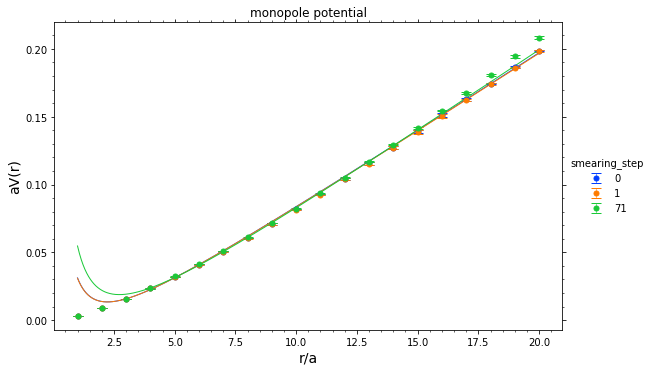

In [13]:
paths = [{'path': '../../result/smearing/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20/potential_monopole.csv',
          'parameters': {'beta': 6.4, 'range_min_T': 16, 'range_min_r': 17}, 'constraints': {'r/a': (1, 20), 'T': (1, 19), 'smearing_step': (0, 71)}}]
df = potential_data.get_potantial_df(paths, ['smearing_step', 'range_min_T', 'range_min_r'])
df = df.reset_index(level='smearing_step')
df = df[df['smearing_step'].isin([0, 1, 10, 71])]
df = df.set_index('smearing_step', append=True)
print(df)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range).reset_index(level=['r/a']).reset_index(level=-1, drop=True)
print(df)
df_fit = df.groupby(df.index.names).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(df.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True)
df_curves = df_fit.groupby(df_fit.index.names).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['smearing_step'])
df = df.reset_index(level=['smearing_step'])
image_path = '../../images/potential/su3/gluodynamics/su3/gluodynamics/potential_smearing/40^4/beta6.4/HYP0_alpha=1_1_0.5_APE_alpha=0.6/steps_0/copies=20'
image_name = 'potential_monopole'
plots.make_plot(df, 'r/a', 'aV(r)', 'smearing_step', 'r/a', 'aV(r)', 'monopole potential', image_path, image_name, True, err='err', df_fits=df_curves)

In [14]:
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (112, 112)}}]
paths_HYP = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 1}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (112, 112)}},
         {'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP3_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 3}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (112, 112)}}]
df = potential_data.get_potantial_df(paths)
df_HYP = potential_data.get_potantial_df(paths_HYP)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'HYP']).reset_index(level=-1, drop=True)
df_HYP = df_HYP.groupby(df_HYP.index.names + ['r/a']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'HYP']).reset_index(level=-1, drop=True)
print(df)
print(df_HYP)
df_fit = df.groupby(df.index.names + ['HYP']).apply(fit.make_fit_range, fit.func_cornell, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err', 6).reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['HYP'])
df_curves = df_fit.groupby(df_fit.index.names + ['HYP']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['HYP'])
V, V_err = fit.fit_curve_shift(df[df['HYP'] == 0], df_fit.loc[df_fit['HYP'] == 1, ['V0', 'alpha', 'sigma']].values[0], 'r/a', 'aV(r)', 'err', fit.func_cornell)
df.loc[df['HYP'] == 1, 'aV(r)'] = df.loc[df['HYP'] == 1, 'aV(r)'] + V
df.loc[df['HYP'] == 1, 'err'] = np.sqrt(df.loc[df['HYP'] == 1, 'err'] ** 2 + V_err ** 2)
df_curves.loc[df_curves['HYP'] == 1, 'aV(r)'] = df_curves.loc[df_curves['HYP'] == 1, 'aV(r)'] + V
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'HYP_comparison'
plots.make_plot(df, 'r/a', 'aV(r)', 'HYP', 'T', 'aV(r)', 'potential original', image_path, f'potential_monopole', True, err='err', df_fits=df_curves)

SyntaxError: positional argument follows keyword argument (1445129163.py, line 13)